# World War Z - A Mathmatical Model

In this course we have studied many interesting and pratical numerical soultion problems intended to give us a better understanding of some the typical engineering problems we as engineers can be expected to solve.  For my final project I have choosen a topic that while interesting to model, is likely never going to be needed by civilization.  With that said lets start modeling a zombie appocalyse.

The first step in modeling for this dooms day scenario would be to basically define what a zombie is.  Per wikipedia, zombies are fictional undead creatures created through the reanimation of human corpses.  Usually in these doomsday senerious some virus is inadventurently introduced into the general population with an initial patient, commonly refered to as "patient zero".  The infection is then spread through the population by bites from infected indiviuals.

-The rate at which zombies move varies greatly from one movie to another.  For the purpose of this model we will assume that the zombies are able to move fairly quickly.

When a human or "Susceptible" encounters a zombie we will assume only two possible outcomes.  
  (1)  The Susceptible prevails in combat removing that one zombie from our system.
  
  or
  
  (2)  The zombie bites the susceptible and converts him/her into a zombie.
  
  We will assume that 

In [340]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [341]:
Ds = .00008
Dz = .00016

beta = 1                    # The probability that a susceptible becomes a zombie when the two encounter each other.
alpha = .5                  # The rate at which zombies are killed

In [342]:
n= 192
dh = 5/(n-1)
T= 8000
dt = .9 * dh**2 / (4*max(Ds,Dz))
nt = int(T/dt)

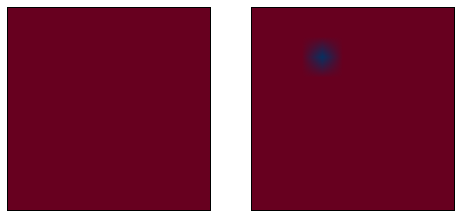

In [343]:
uvinitial=numpy.load('/Users/jasonliz/MAE6286/uvinitial.npz')
S= numpy.ones((10,10))
Z= numpy.zeros((10,10))
Z[2,3] = 1.0

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(S, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(Z, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [344]:
def ftcs(S, Z, nt, dt, dh):
    
    Sn = S.copy()
    Zn = Z.copy()
    
    for n in range(nt):
        S[1:-1,1:-1]=Sn[1:-1,1:-1]+Ds*(dt/dh**2 * (Sn[2:,1:-1] - 2*Sn[1:-1,1:-1] + Sn[:-2,1:-1]) + dt/dh**2 * (Sn[1:-1,2:] - 2*Sn[1:-1,1:-1] + Sn[1:-1,:-2])) - (beta*Sn[1:-1,1:-1]*Zn[1:-1,1:-1] * dt)
        Z[1:-1,1:-1]=Zn[1:-1,1:-1]+Dz*(dt/dh**2 * (Zn[2:,1:-1] - 2*Zn[1:-1,1:-1] + Zn[:-2,1:-1]) + dt/dh**2 * (Zn[1:-1,2:] - 2*Zn[1:-1,1:-1] + Zn[1:-1,:-2])) + (beta*Sn[1:-1,1:-1]*Zn[1:-1,1:-1] * dt) + ((beta-alpha)*Sn[1:-1,1:-1]*Zn[1:-1,1:-1] * dt)
            
        # Neumann conditions everywhere
        S[0,:] = S[1,:]
        S[:,0] = S[:,1]
        S[-1,:] = S[-2,:]
        S[:,-1] = S[:,-2]
        Z[0,:] = Z[1,:]
        Z[:,0] = Z[:,1]
        Z[-1,:] = Z[-2,:]
        Z[:,-1] = Z[:,-2]
    
    return S, Z

In [345]:
Zombie=ftcs(S, Z, nt, dt, dh)

In [346]:
print(Z)

[[ 0.          0.          0.          0.225       0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.225       0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.225       1.54552986  0.225       0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.225       0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0

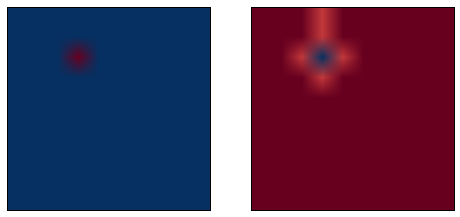

In [347]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(S, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(Z, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [348]:
print(S)

[[ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          0.03631342  1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.          1